In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('https://github.com/codebasics/py/raw/master/ML/1_linear_reg/homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


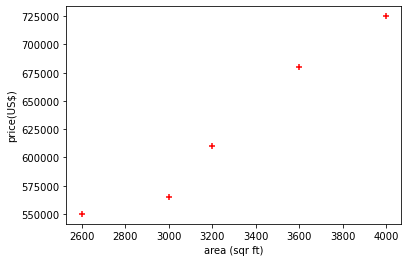

In [4]:
# scatterplot
%matplotlib inline
plt.xlabel('area (sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area, df.price, color='red',marker='+')

# we can see that the distribution is suitable for linear regression model 

In [15]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [16]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [17]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [18]:
# Predict price of a home with area = 3300 sqr ft
reg.predict([[3300]])

array([628715.75342466])

In [19]:
reg.coef_  # this is my m means coefficent or slop

array([135.78767123])

In [20]:
reg.intercept_  # this is our b means intercept 

180616.43835616432

In [21]:
# y=m*x+b
135.78767123*3300+180616.43835616432  # here you got the prediction of 3300 sqrt ft

628715.7534151643

In [22]:
# Predict price of a home with area = 5000 sqr ft
reg.predict([[5000]])

array([859554.79452055])

# Generate CSV file with list of home price predictions

In [23]:
d = pd.read_csv('https://github.com/codebasics/py/raw/master/ML/1_linear_reg/areas.csv')
d

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [26]:
# use regression model to predict the prices
p = reg.predict(d)  # this is the prediction

In [27]:
d ['prices'] = p  # here we creating a new column

In [28]:
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


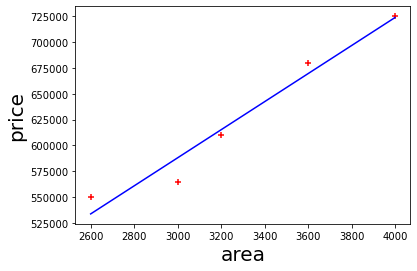

In [29]:
# scatterplot with prediction
%matplotlib inline
plt.xlabel('area', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.scatter(df.area, df.price, color='red',marker='+')
plt.plot(df.area, reg.predict(df[['area']]),color='blue')